# **Importation of packages and dataset reading**
### **Importação das bibliotecas e leitura do arquivo**

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
dataset = pd.read_csv("diabetes.csv", sep = ";")
dataset.head(10)

# Reading the first 10 lines (Lendo as primeiras 10 lindas)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,0
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# **Translation the labels to portuguese (Traduzindo as legendas para o português)**

**Pregnancies** - Total de gravidez de uma mulher

**Glucose** - Glicose 

**Blood Pressure** - Pressão sanguínea

**Skin Thickness** - Espessura da pele (em mm)

**Insulin** - Insulin

**BMI** - IMC 

**Diabetes Pedigree** - Tendência a diabetes

**Age** - Idade

**Outcome** - Resultado (0 - no diabetes / 1 - diabetic)

# **Descriptive Statistic**
## **Estatística Descritiva**

In [143]:
dataset.describe().round(2)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigree,age,outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.40
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


# **Correlation Matrix**
## **Matriz de Correlação**

In [144]:
dataset.corr().round(4)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigree,age,outcome
pregnancies,1.0000,0.1295,0.1413,-0.0817,-0.0735,0.0177,-0.0335,0.5443,0.1254
glucose,0.1295,1.0000,0.1526,0.0573,0.3314,0.2211,0.1373,0.2635,0.7972
bloodpressure,0.1413,0.1526,1.0000,0.2074,0.0889,0.2818,0.0413,0.2395,0.1575
skinthickness,-0.0817,0.0573,0.2074,1.0000,0.4368,0.3926,0.1839,-0.1140,0.0333
insulin,-0.0735,0.3314,0.0889,0.4368,1.0000,0.1979,0.1851,-0.0422,0.2810
bmi,0.0177,0.2211,0.2818,0.3926,0.1979,1.0000,0.1406,0.0362,0.2008
diabetespedigree,-0.0335,0.1373,0.0413,0.1839,0.1851,0.1406,1.0000,0.0336,0.1104
age,0.5443,0.2635,0.2395,-0.1140,-0.0422,0.0362,0.0336,1.0000,0.2575
outcome,0.1254,0.7972,0.1575,0.0333,0.2810,0.2008,0.1104,0.2575,1.0000


# **Identificating Outliers**
## **Identificando Outliers**

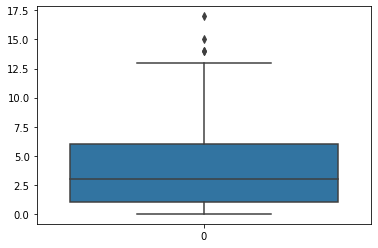

In [145]:
ax = sns.boxplot(data = dataset["pregnancies"])
ax

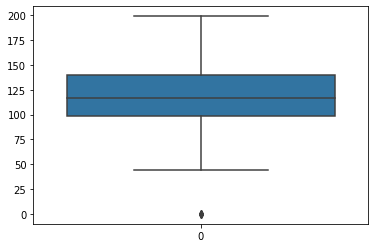

In [146]:
ax = sns.boxplot(data = dataset["glucose"])
ax

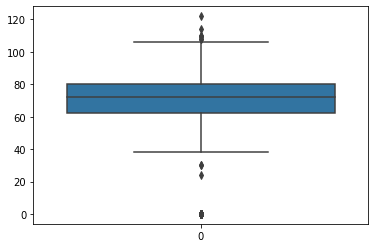

In [147]:
ax = sns.boxplot(data = dataset["bloodpressure"])
ax

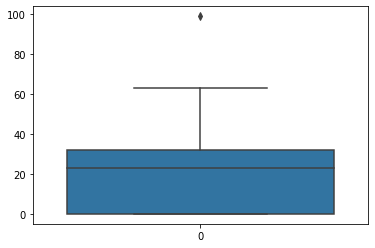

In [148]:
ax = sns.boxplot(data = dataset["skinthickness"])
ax

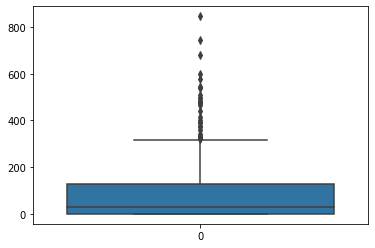

In [149]:
ax = sns.boxplot(data = dataset["insulin"])
ax

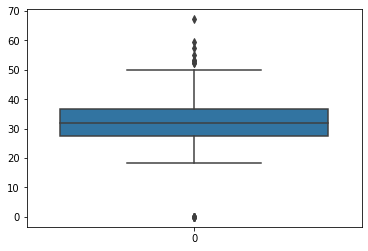

In [150]:
ax = sns.boxplot(data = dataset["bmi"])
ax

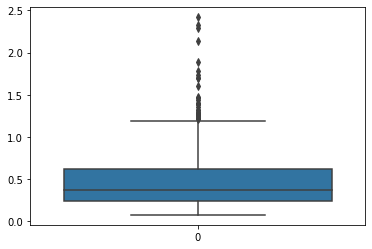

In [151]:
ax = sns.boxplot(data = dataset["diabetespedigree"])
ax

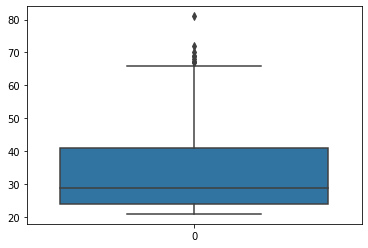

In [152]:
ax = sns.boxplot(data = dataset["age"])
ax

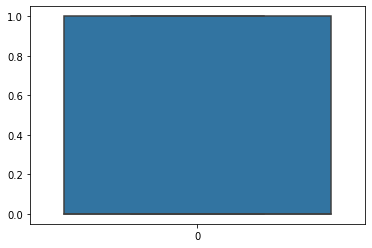

In [153]:
ax = sns.boxplot(data = dataset["outcome"])
ax

# **Graphic Analysis**
## **Análises Gráficas**

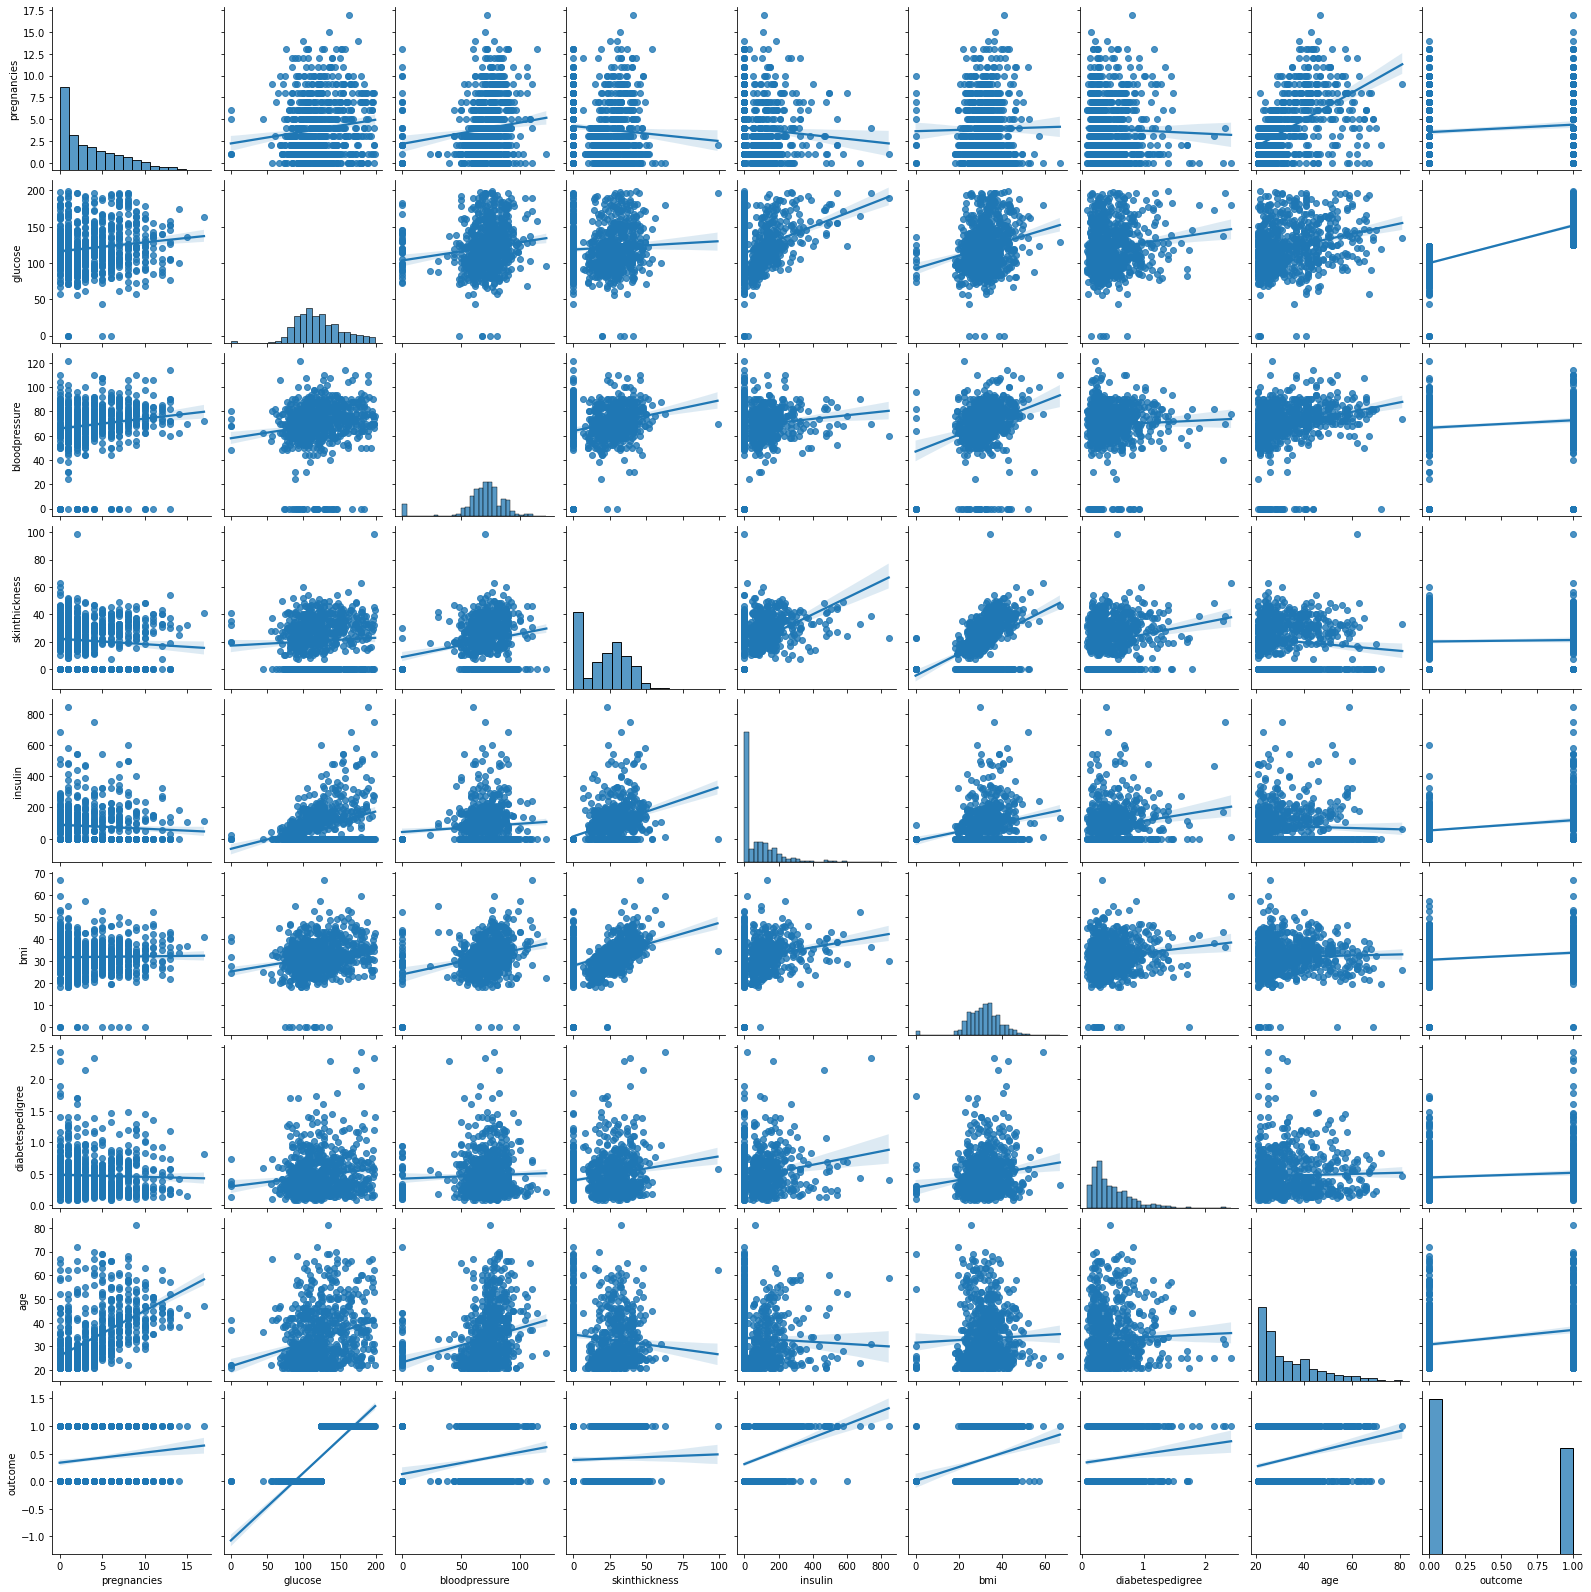

In [154]:
ax = sns.pairplot(dataset, kind = "reg")

### **Graphic Analysis of dependente variable Y (glucose)**

**Análise Gráfica da variável dependente Y (glicose)**

**Depending the glucose level in the blood, there are an increase in the others variables, especially insulin, BMI and age.**

Conforme aumenta o nível de glicose no sangue, há um crescimento nas demais variáveis, principalmente em insulina, IMC e idade.

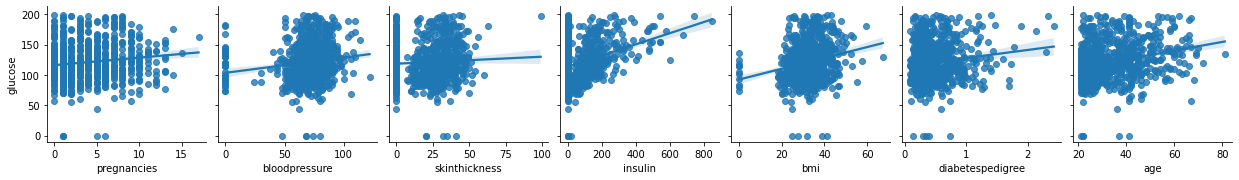

In [155]:
ax = sns.pairplot(dataset, y_vars="glucose", x_vars=["pregnancies", "bloodpressure", "skinthickness", "insulin", "bmi", "diabetespedigree", "age"], kind = "reg")

**Classification the glucose levels by categories according your index: Hypoglycemic, Normal, Early Diabetes and Diabetic.**

Classificação dos níveis de glicose por categorias de acordo com seu índice: Hipoglicêmico, Normal, Pré Diabético e Diabético.

In [156]:
filters = [(dataset.glucose < 70),
           (dataset.glucose >= 70) & (dataset.glucose < 100),
           (dataset.glucose >= 100) & (dataset.glucose < 125),
           (dataset.glucose >= 125)]

values = ["hypoglycemic", "normal", "early_diabetes", "diabetic"]

dataset["category"] = np.select(filters, values)
dataset

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigree,age,outcome,category
0,6,148,72,35,0,33.6,0.627,50,1,diabetic
1,1,85,66,29,0,26.6,0.351,31,0,normal
2,8,183,64,0,0,23.3,0.672,32,1,diabetic
3,1,89,66,23,94,28.1,0.167,21,0,normal
4,0,137,40,35,168,43.1,2.288,33,1,diabetic
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,early_diabetes
764,2,122,70,27,0,36.8,0.340,27,0,early_diabetes
765,5,121,72,23,112,26.2,0.245,30,0,early_diabetes
766,1,126,60,0,0,30.1,0.349,47,1,diabetic


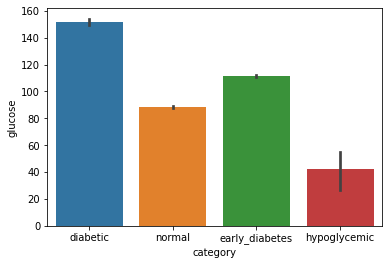

In [157]:
dataset= pd.DataFrame(dataset)
sns.barplot(x = "category", y = "glucose", data = dataset)

**Comparing the difference between the diabetics and no diabetics with some variables as BMI, insulin, age and blood pressure.**

Comparando a diferença entre diabéticos e não diabéticos com algumas variáveis ​​como IMC, insulina, idade and pressão arterial.

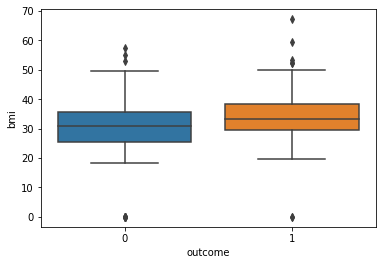

In [158]:
ax = sns.boxplot(y = "bmi", x = "outcome", data = dataset)
ax

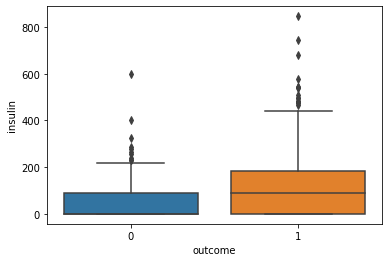

In [159]:
ax = sns.boxplot(y = "insulin", x = "outcome", data = dataset)
ax

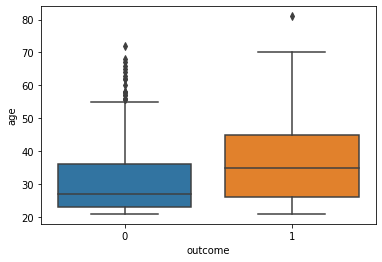

In [160]:
ax = sns.boxplot(y = "age", x = "outcome", data = dataset)
ax

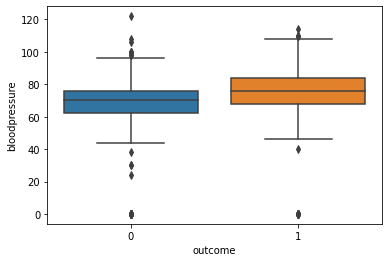

In [161]:
ax = sns.boxplot(y = "bloodpressure", x = "outcome", data = dataset)
ax

**After analysed the data set, will apply a simple ML algorithm based with the processed informations above.**

Após analisado o conjunto de dados, será aplicado um algoritmo de ML simples baseado nas informações processadas acima.

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
y = dataset["glucose"]

In [164]:
X = dataset[["pregnancies", "bloodpressure", "insulin", "bmi", "age", "diabetespedigree", "outcome"]]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2811)

In [166]:
X_train.shape

(537, 7)

In [167]:
X_test.shape

(231, 7)

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [169]:
model = LinearRegression()

In [170]:
model.fit(X_train, y_train)

LinearRegression()

In [171]:
# Coefficient of Determination (Coeficiente de Determinação) (R²)

print("R² = {}".format(model.score(X_train, y_train).round(2)))

R² = 0.65


In [172]:
y_previsto = model.predict(X_test)

In [173]:
print("R² = %s" % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.66


In [174]:
y_previsto_train = model.predict(X_train)

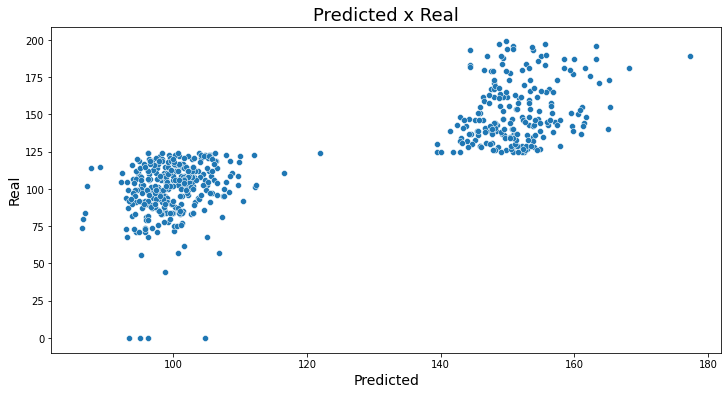

In [175]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title("Predicted x Real", fontsize = 18)
ax.set_xlabel("Predicted", fontsize = 14)
ax.set_ylabel("Real", fontsize = 14)
ax

In [176]:
index = ["Glucose", "Pregnancies", "Blood Pressure", "Insulin", "BMI", "Age", "Diabetes Pedigree", "outcome"]
pd.DataFrame(data = np.append(model.intercept_, model.coef_), index = index, columns = ["Parameters"])

,Parameters
Glucose,79.863366
Pregnancies,0.002863
Blood Pressure,-0.007805
Insulin,0.028896
BMI,0.295706
Age,0.277086
Diabetes Pedigree,3.428237
outcome,46.924010


In [177]:
data_input = X_test[0:1]
data_input

,pregnancies,bloodpressure,insulin,bmi,age,diabetespedigree,outcome
481,0,88,0,35.2,29,0.197,0


In [178]:
model.predict(data_input)[0]

98.2962273222596